In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

from algos import Algorithms

![Formula for p_i](../res/p_i-formula.png "Formula for $p_i$")
![Bounds](../res/bounds.png "Bounds")

# Experiments
### Fixed $c$, increasing dimensions

In the following section I will test the algorithm's accuracy on matrices where the matching dimensions are increased, and everything else stays constant.
$$ $$
Random matrices with entries in $\[0,1\]$, sparse (density = 0.01) and dense
$ \delta = 0.05 \quad c = 50 \quad$ For dimensions 50 -> 1000 with increment of 50.

In [13]:
# Gather results
dimensions = [] + list(range(50, 1001, 25))
errors_normal = []
bounds_normal = []
errors_sparse = []
bounds_sparse = []

print("Calculating for random matrices")
for dim in dimensions:
    print(f"Calculating for dimension {dim}/1000...")
    c = 50
    
    A = np.random.rand(1000, dim)
    B = np.random.rand(dim, 1000)
    
    prob = Algorithms.get_optimal_probdist(A, B)
    res = Algorithms.basic_matrix_mult(A, B, c=c, prob=prob)
    
    delta = 0.05
    whp_bound = Algorithms.calculate_prob_bound(A=A, B=B, c=c, delta=delta)
    
    errors_normal.append(np.linalg.norm(A @ B - res, ord='fro'))
    bounds_normal.append(whp_bound)

Calculating for random matrices
Calculating for dimension 50/1000...
Calculating for dimension 75/1000...
Calculating for dimension 100/1000...
Calculating for dimension 125/1000...
Calculating for dimension 150/1000...
Calculating for dimension 175/1000...
Calculating for dimension 200/1000...
Calculating for dimension 225/1000...
Calculating for dimension 250/1000...
Calculating for dimension 275/1000...
Calculating for dimension 300/1000...
Calculating for dimension 325/1000...
Calculating for dimension 350/1000...
Calculating for dimension 375/1000...
Calculating for dimension 400/1000...
Calculating for dimension 425/1000...
Calculating for dimension 450/1000...
Calculating for dimension 475/1000...
Calculating for dimension 500/1000...
Calculating for dimension 525/1000...
Calculating for dimension 550/1000...
Calculating for dimension 575/1000...
Calculating for dimension 600/1000...
Calculating for dimension 625/1000...
Calculating for dimension 650/1000...
Calculating for dime

NameError: name 'scipy' is not defined

In [16]:
print("Calculating for random sparse matrices")
for dim in dimensions:
    print(f"Calculating for dimension {dim}/1000...")
    c = 50
    
    A = scipy.sparse.random(1000, dim, density=0.01).toarray()
    B = scipy.sparse.random(dim, 1000, density=0.01).toarray()
    
    prob = Algorithms.get_optimal_probdist(A, B)
    res = Algorithms.basic_matrix_mult(A, B, c=c, prob=prob)
    
    delta = 0.05
    whp_bound = Algorithms.calculate_prob_bound(A=A, B=B, c=c, delta=delta)
    
    errors_sparse.append(np.linalg.norm(A @ B - res, ord='fro'))
    bounds_sparse.append(whp_bound)

Calculating for random sparse matrices
Calculating for dimension 50/1000...
Calculating for dimension 75/1000...
Calculating for dimension 100/1000...
Calculating for dimension 125/1000...
Calculating for dimension 150/1000...
Calculating for dimension 175/1000...
Calculating for dimension 200/1000...
Calculating for dimension 225/1000...
Calculating for dimension 250/1000...
Calculating for dimension 275/1000...
Calculating for dimension 300/1000...
Calculating for dimension 325/1000...
Calculating for dimension 350/1000...
Calculating for dimension 375/1000...
Calculating for dimension 400/1000...
Calculating for dimension 425/1000...
Calculating for dimension 450/1000...
Calculating for dimension 475/1000...
Calculating for dimension 500/1000...
Calculating for dimension 525/1000...
Calculating for dimension 550/1000...
Calculating for dimension 575/1000...
Calculating for dimension 600/1000...
Calculating for dimension 625/1000...
Calculating for dimension 650/1000...
Calculating f

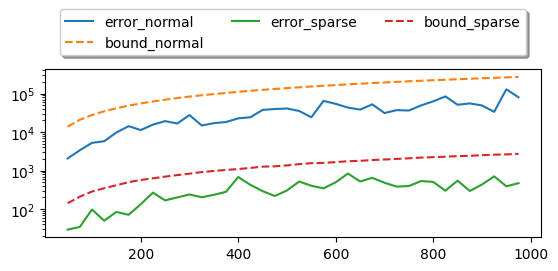

In [35]:
# Plot results

fig = plt.figure()
yerr = np.linspace(1, 1, 100_000)
ax = fig.add_subplot(2, 1, 1)
ax.set_yscale('log')

plt.errorbar(dimensions, errors_normal, label='error_normal')
plt.errorbar(dimensions, bounds_normal, label='bound_normal', uplims=True, fmt='--')

plt.errorbar(dimensions, errors_sparse, label='error_sparse')
plt.errorbar(dimensions, bounds_sparse, uplims=True, label='bound_sparse', fmt="--")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4),
          ncol=3, fancybox=True, shadow=True)

Fix 1000x1000 dimension, but c is increased

In [40]:
# Gather results
c_vals = [] + list(range(50, 1001, 50))
errors_normal = []
bounds_normal = []
errors_sparse = []
bounds_sparse = []

print("Calculating for random matrices")
for c in c_vals:
    print(f"Calculating for c = {c}...")
    
    A = np.random.rand(1000, 1000)
    B = np.random.rand(1000, 1000)
    
    prob = Algorithms.get_optimal_probdist(A, B)
    res = Algorithms.basic_matrix_mult(A, B, c=c, prob=prob)
    
    delta = 0.05
    whp_bound = Algorithms.calculate_prob_bound(A=A, B=B, c=c, delta=delta)
    
    errors_normal.append(np.linalg.norm(A @ B - res, ord='fro'))
    bounds_normal.append(whp_bound)
    
print("Calculating for random sparse matrices")
for c in c_vals:
    print(f"Calculating for c = {c}...")
    
    A = scipy.sparse.random(1000, 1000, density=0.01).toarray()
    B = scipy.sparse.random(1000, 1000, density=0.01).toarray()
    
    prob = Algorithms.get_optimal_probdist(A, B)
    res = Algorithms.basic_matrix_mult(A, B, c=c, prob=prob)
    
    delta = 0.05
    whp_bound = Algorithms.calculate_prob_bound(A=A, B=B, c=c, delta=delta)
    
    errors_sparse.append(np.linalg.norm(A @ B - res, ord='fro'))
    bounds_sparse.append(whp_bound)

Calculating for random matrices
Calculating for c = 50...
Calculating for c = 100...
Calculating for c = 150...
Calculating for c = 200...
Calculating for c = 250...
Calculating for c = 300...
Calculating for c = 350...
Calculating for c = 400...
Calculating for c = 450...
Calculating for c = 500...
Calculating for c = 550...
Calculating for c = 600...
Calculating for c = 650...
Calculating for c = 700...
Calculating for c = 750...
Calculating for c = 800...
Calculating for c = 850...
Calculating for c = 900...
Calculating for c = 950...
Calculating for c = 1000...
Calculating for random sparse matrices
Calculating for c = 50...
Calculating for c = 100...
Calculating for c = 150...
Calculating for c = 200...
Calculating for c = 250...
Calculating for c = 300...
Calculating for c = 350...
Calculating for c = 400...
Calculating for c = 450...
Calculating for c = 500...
Calculating for c = 550...
Calculating for c = 600...
Calculating for c = 650...
Calculating for c = 700...
Calculating 

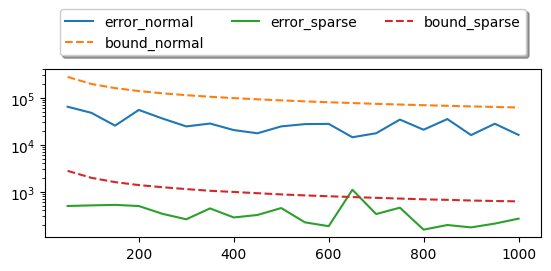

In [41]:
# Plot results

fig = plt.figure()
yerr = np.linspace(1, 1, 100_000)
ax = fig.add_subplot(2, 1, 1)
ax.set_yscale('log')

plt.errorbar(c_vals, errors_normal, label='error_normal')
plt.errorbar(c_vals, bounds_normal, label='bound_normal', uplims=True, fmt='--')

plt.errorbar(c_vals, errors_sparse, label='error_sparse')
plt.errorbar(c_vals, bounds_sparse, uplims=True, label='bound_sparse', fmt="--")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4),
          ncol=3, fancybox=True, shadow=True)